In [1]:
import numpy as np
import random
n = 40428967  #total number of records in the clickstream data 
sample_size = 1000000
skip_values = sorted(random.sample(range(1,n), n-sample_size)) 

types_train = {
    'id': np.dtype(int),
    'click': np.dtype(int),
    'hour': np.dtype(int),
    'C1': np.dtype(int),
    'banner_pos': np.dtype(int),
    'site_id': np.dtype(str),
    'site_domain': np.dtype(str), 
    'site_category': np.dtype(str),
    'app_id': np.dtype(str),
    'app_domain': np.dtype(str),
    'app_category': np.dtype(str),
    'device_id': np.dtype(str),
    'device_ip': np.dtype(str),
    'device_model': np.dtype(str),
    'device_type': np.dtype(int),
    'device_conn_type': np.dtype(int),
    'C14': np.dtype(int),
    'C15': np.dtype(int),
    'C16': np.dtype(int),
    'C17': np.dtype(int),
    'C18': np.dtype(int),
    'C19': np.dtype(int),
    'C20': np.dtype(int),
    'C21':np.dtype(int)
}

types_test = {
    'id': np.dtype(int),
    'hour': np.dtype(int),
    'C1': np.dtype(int),
    'banner_pos': np.dtype(int),
    'site_id': np.dtype(str),
    'site_domain': np.dtype(str), 
    'site_category': np.dtype(str),
    'app_id': np.dtype(str),
    'app_domain': np.dtype(str),
    'app_category': np.dtype(str),
    'device_id': np.dtype(str),
    'device_ip': np.dtype(str),
    'device_model': np.dtype(str),
    'device_type': np.dtype(int),
    'device_conn_type': np.dtype(int),
    'C14': np.dtype(int),
    'C15': np.dtype(int),
    'C16': np.dtype(int),
    'C17': np.dtype(int),
    'C18': np.dtype(int),
    'C19': np.dtype(int),
    'C20': np.dtype(int),
    'C21':np.dtype(int)
}

In [2]:
import pandas as pd
import gzip

parse_date = lambda val : pd.datetime.strptime(val, '%y%m%d%H')

with gzip.open('avazu-ctr-prediction/train.gz') as f:
    train = pd.read_csv(f, parse_dates = ['hour'], date_parser = parse_date, dtype=types_train, skiprows = skip_values)

train.head()

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,10000640724480838376,0,2014-10-21,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15706,320,50,1722,0,35,100084,79
1,10000720757801103869,0,2014-10-21,1005,0,d6137915,bb1ef334,f028772b,ecad2386,7801e8d9,...,1,0,16920,320,50,1899,0,431,100077,117
2,10006415976094813740,0,2014-10-21,1005,0,f84e52b6,d7e2f29b,28905ebd,ecad2386,7801e8d9,...,1,0,16838,320,50,1882,3,35,-1,13
3,10006490708516192015,1,2014-10-21,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15708,320,50,1722,0,35,100083,79
4,10009147085943364421,0,2014-10-21,1005,1,e151e245,7e091613,f028772b,ecad2386,7801e8d9,...,1,0,17037,320,50,1934,2,39,-1,16


In [4]:
train['click'].value_counts()

0    830080
1    169920
Name: click, dtype: int64

In [28]:
train['hour_of_day']=train['hour'].apply(lambda x:x.hour)

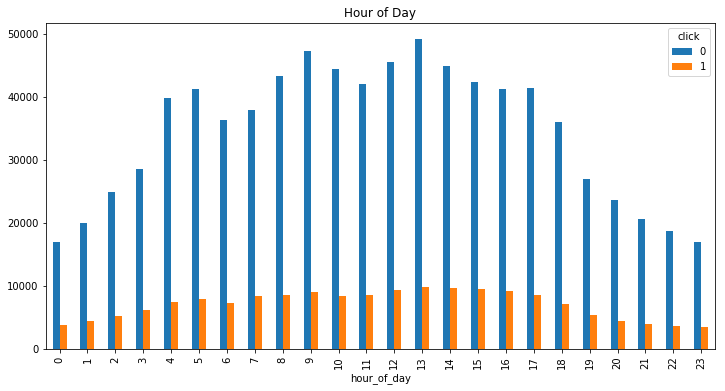

In [29]:
train.groupby(['hour_of_day', 'click']).size().unstack().plot(kind='bar', title="Hour of Day", figsize=(12,6))

# Now that we have looked at clicks and impressions. We can calculate click-through rate (CTR). CTR is the ratio of ad clicks to impressions. It measures the rate of clicks on each ad.


In [32]:
import seaborn as sns

df_click = train[train['click'] == 1]
df_hour = train[['hour_of_day','click']].groupby(['hour_of_day']).count().reset_index()

In [34]:
df_hour = df_hour.rename(columns={'click': 'impressions'})

In [37]:
df_hour['clicks'] = df_click[['hour_of_day','click']].groupby(['hour_of_day']).count().reset_index()['click']

In [41]:
df_hour['CTR'] = df_hour['clicks']/df_hour['impressions']*100

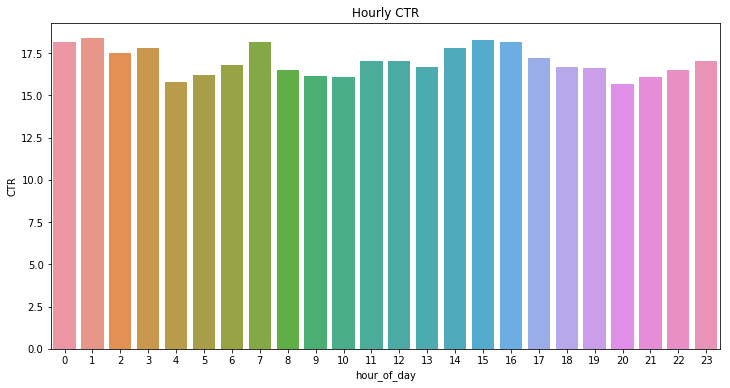

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
sns.barplot(y='CTR', x='hour_of_day', data=df_hour)
plt.title('Hourly CTR');

/Users/mananparasher/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: `weekday_name` is deprecated and will be removed in a future version. Use `day_name` instead
  


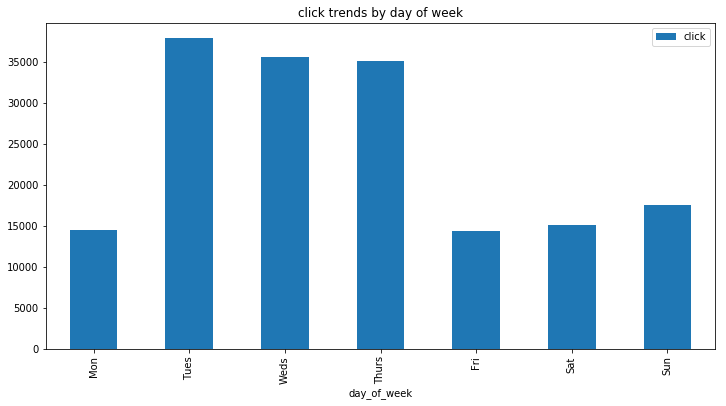

In [46]:

train['day_of_week'] = train['hour'].apply(lambda val: val.weekday_name)
cats = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
train.groupby('day_of_week').agg({'click':'sum'}).reindex(cats).plot(figsize=(12,6),kind='bar')
ticks = list(range(0, 7, 1)) # points on the x axis where you want the label to appear
labels = "Mon Tues Weds Thurs Fri Sat Sun".split()
plt.xticks(ticks, labels)
plt.title('click trends by day of week');

# This analysis showed that on which day, CTR was higher.

In [77]:
df_click = train[train['click'] == 1]

In [78]:
df_click

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,C14,C15,C16,C17,C18,C19,C20,C21,hour_of_day,day_of_week
3,10006490708516192015,1,2014-10-21 00:00:00,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,15708,320,50,1722,0,35,100083,79,0,Tuesday
15,10058856496220336790,1,2014-10-21 00:00:00,1005,0,85f751fd,c4e18dd6,50e219e0,98fed791,d9b5648e,...,20984,320,50,2371,0,551,100215,46,0,Tuesday
20,10086427470103034398,1,2014-10-21 00:00:00,1005,1,d9750ee7,98572c79,f028772b,ecad2386,7801e8d9,...,17753,320,50,1993,2,1063,-1,33,0,Tuesday
24,10123713743368122062,1,2014-10-21 00:00:00,1005,0,85f751fd,c4e18dd6,50e219e0,febd1138,82e27996,...,20508,320,50,2351,3,163,-1,61,0,Tuesday
34,1016946377514530119,1,2014-10-21 00:00:00,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,15708,320,50,1722,0,35,-1,79,0,Tuesday
50,10316041495196897373,1,2014-10-21 00:00:00,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,15708,320,50,1722,0,35,-1,79,0,Tuesday
55,10353678754584944668,1,2014-10-21 00:00:00,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,15703,320,50,1722,0,35,-1,79,0,Tuesday
73,10435049352370131547,1,2014-10-21 00:00:00,1005,1,d9750ee7,98572c79,f028772b,ecad2386,7801e8d9,...,17753,320,50,1993,2,1063,-1,33,0,Tuesday
75,10440171399651689564,1,2014-10-21 00:00:00,1005,0,5b08c53b,7687a86e,3e814130,ecad2386,7801e8d9,...,19016,300,250,2162,2,39,100119,33,0,Tuesday
86,10487234507972348950,1,2014-10-21 00:00:00,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,15704,320,50,1722,0,35,-1,79,0,Tuesday


In [81]:
df_dayofweek = train[['day_of_week','click']].groupby(['day_of_week']).count().reset_index()

In [83]:
df_dayofweek = df_dayofweek.rename(columns={'click': 'impressions'})

In [84]:
df_dayofweek['clicks']=df_click[['day_of_week','click']].groupby(['day_of_week']).count().reset_index()['click']

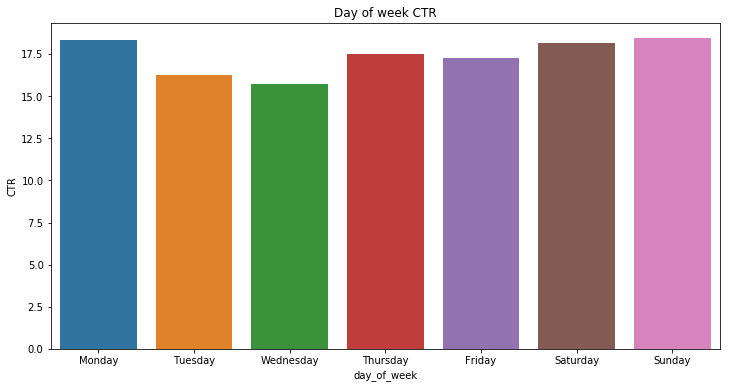

In [86]:
df_dayofweek['CTR'] = df_dayofweek['clicks']/df_dayofweek['impressions']*100

plt.figure(figsize=(12,6))
sns.barplot(y='CTR', x='day_of_week', data=df_dayofweek, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Day of week CTR');


# While Tuesdays and Wednesdays have the highest number of impressions and clicks, their CTR are among the lowest. Saturdays and Sundays enjoy the highest CTR. Apparently, people have more time to click over the weekend.

In [88]:
train.C1.value_counts()

1005    918830
1002     54873
1010     22301
1012      2746
1007       857
1001       250
1008       143
Name: C1, dtype: int64

In [91]:
C1_values = train.C1.unique()
C1_values.sort()
ctr_avg_list=[]
for i in C1_values:
    ctr_avg=train.loc[np.where((train.C1 == i))].click.mean()
    ctr_avg_list.append(ctr_avg)
    print("for C1 value: {},  click through rate: {}".format(i,ctr_avg))

for C1 value: 1001,  click through rate: 0.024
for C1 value: 1002,  click through rate: 0.21323784010351174
for C1 value: 1005,  click through rate: 0.16934253343926514
for C1 value: 1007,  click through rate: 0.043173862310385065
for C1 value: 1008,  click through rate: 0.08391608391608392
for C1 value: 1010,  click through rate: 0.09434554504282319
for C1 value: 1012,  click through rate: 0.16860888565185725


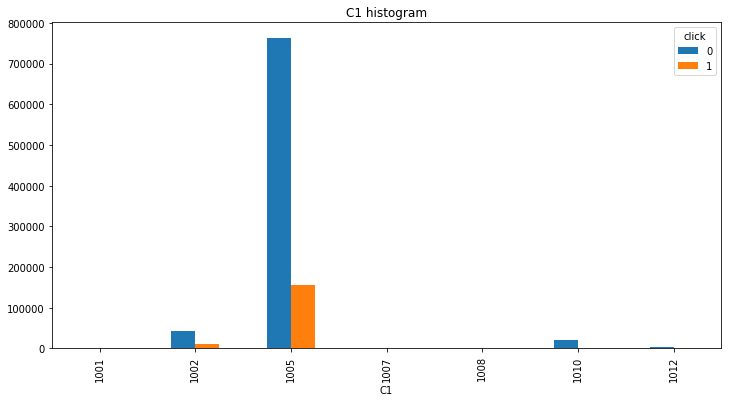

In [92]:
train.groupby(['C1', 'click']).size().unstack().plot(kind='bar', figsize=(12,6), title='C1 histogram');


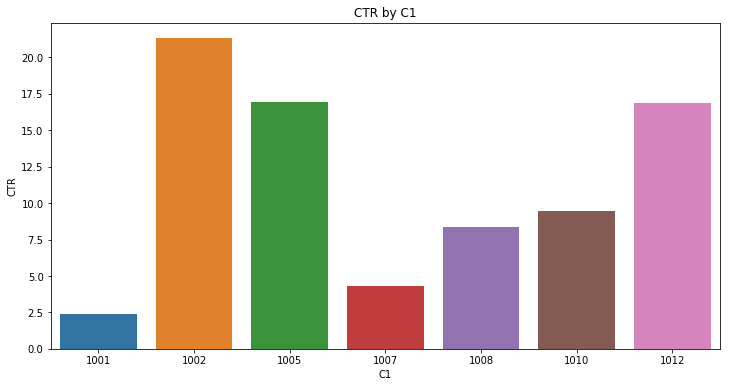

In [93]:
df_c1 = train[['C1','click']].groupby(['C1']).count().reset_index()
df_c1 = df_c1.rename(columns={'click': 'impressions'})
df_c1['clicks'] = df_click[['C1','click']].groupby(['C1']).count().reset_index()['click']
df_c1['CTR'] = df_c1['clicks']/df_c1['impressions']*100

plt.figure(figsize=(12,6))
sns.barplot(y='CTR', x='C1', data=df_c1)
plt.title('CTR by C1');

The important C1 values and CTR pairs are:

1005: 92% of the data and 0.17 CTR

1002: 5.5% of the data and 0.21 CTR

1010: 2.3% of the data and 0.096 CTR

1002 has a much higher than average CTR, and 1010 has a much lower than average CTR, it seems these two C1 values are important for predicting CTR.

In [94]:
print(train.banner_pos.value_counts()/len(train))

0    0.719764
1    0.278485
7    0.001098
2    0.000291
4    0.000176
5    0.000142
3    0.000044
Name: banner_pos, dtype: float64


In [95]:

banner_pos = train.banner_pos.unique()
banner_pos.sort()
ctr_avg_list=[]
for i in banner_pos:
    ctr_avg=train.loc[np.where((train.banner_pos == i))].click.mean()
    ctr_avg_list.append(ctr_avg)
    print("for banner position: {},  click through rate: {}".format(i,ctr_avg))

for banner position: 0,  click through rate: 0.16439416253105185
for banner position: 1,  click through rate: 0.18367237014560928
for banner position: 2,  click through rate: 0.10652920962199312
for banner position: 3,  click through rate: 0.20454545454545456
for banner position: 4,  click through rate: 0.17045454545454544
for banner position: 5,  click through rate: 0.08450704225352113
for banner position: 7,  click through rate: 0.33060109289617484


In [96]:
df_banner=train[['banner_pos','click']].groupby(['banner_pos']).count().reset_index()

In [98]:
df_banner = df_banner.rename(columns={'click': 'impressions'})

In [100]:
df_banner['clicks']=df_click[['banner_pos','click']].groupby('banner_pos').count().reset_index()['click']

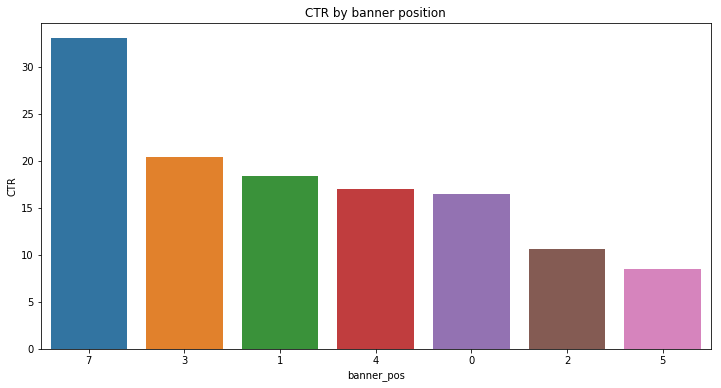

In [102]:
df_banner['CTR'] = df_banner['clicks']/df_banner['impressions']*100
sort_banners = df_banner.sort_values(by='CTR',ascending=False)['banner_pos'].tolist()
plt.figure(figsize=(12,6))
sns.barplot(y='CTR', x='banner_pos', data=df_banner, order=sort_banners)
plt.title('CTR by banner position');


Although banner position 0 and 1 have the highest number of impressions and clicks, banner 7 enjoys the highest click through rate. Increasing the number of ads placed on banner position 7 seems to be a good idea.

# Site features

In [103]:
top10_ids = (train.site_id.value_counts()/len(train))[0:10].index
click_avg_list=[]

for i in top10_ids:
    click_avg=train.loc[np.where((train.site_id == i))].click.mean()
    click_avg_list.append(click_avg)
    print("for site id value: {},  click through rate: {}".format(i,click_avg))

for site id value: 85f751fd,  click through rate: 0.1181205338712314
for site id value: 1fbe01fe,  click through rate: 0.205825109904801
for site id value: e151e245,  click through rate: 0.29708145559336585
for site id value: d9750ee7,  click through rate: 0.2808496291301416
for site id value: 5b08c53b,  click through rate: 0.4690143964562569
for site id value: 5b4d2eda,  click through rate: 0.1258890100192078
for site id value: 856e6d3f,  click through rate: 0.04521080853748292
for site id value: a7853007,  click through rate: 0.0979282729805014
for site id value: b7e9786d,  click through rate: 0.0751005325508097
for site id value: 5ee41ff2,  click through rate: 0.33083659829453793


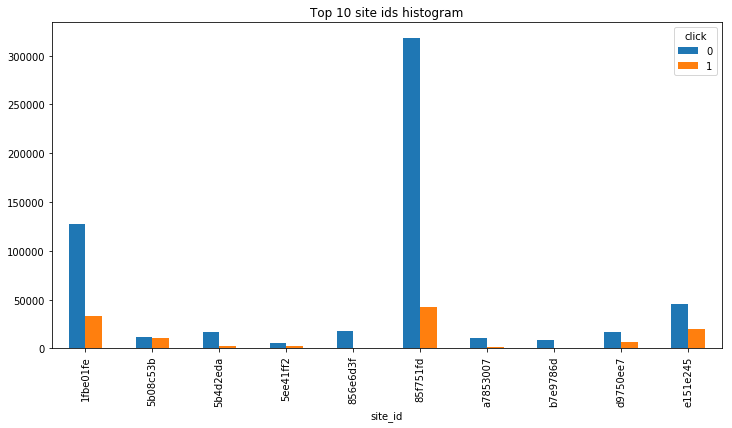

In [104]:
top10_sites = train[(train.site_id.isin((train.site_id.value_counts()/len(train))[0:10].index))]
top10_sites_click = top10_sites[top10_sites['click'] == 1]
top10_sites.groupby(['site_id', 'click']).size().unstack().plot(kind='bar', figsize=(12,6), title='Top 10 site ids histogram');

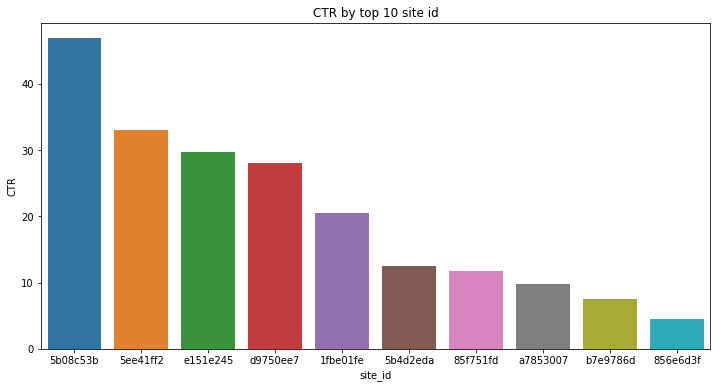

In [105]:
df_site = top10_sites[['site_id','click']].groupby(['site_id']).count().reset_index()
df_site = df_site.rename(columns={'click': 'impressions'})
df_site['clicks'] = top10_sites_click[['site_id','click']].groupby(['site_id']).count().reset_index()['click']
df_site['CTR'] = df_site['clicks']/df_site['impressions']*100
sort_site = df_site.sort_values(by='CTR',ascending=False)['site_id'].tolist()
plt.figure(figsize=(12,6))
sns.barplot(y='CTR', x='site_id', data=df_site, order=sort_site)
plt.title('CTR by top 10 site id');

The site_id feature seems important because the CTR for the top 10 sites, some as high as 0.47, and some as low as 0.04, and they are significantly different from overall CTR 0.16.

# site domain

In [106]:
print('The top 10 site domains that have the most impressions')
print((train.site_domain.value_counts()/len(train))[0:10])

The top 10 site domains that have the most impressions
c4e18dd6    0.374248
f3845767    0.160821
7e091613    0.082332
7687a86e    0.032085
98572c79    0.024546
16a36ef3    0.021346
58a89a43    0.019022
9d54950b    0.009301
b12b9f85    0.009298
17d996e6    0.008793
Name: site_domain, dtype: float64


In [107]:
top10_domains = (train.site_domain.value_counts()/len(train))[0:10].index
click_avg_list=[]

for i in top10_domains:
    click_avg=train.loc[np.where((train.site_domain == i))].click.mean()
    click_avg_list.append(click_avg)
    print("for site domain value: {},  click through rate: {}".format(i,click_avg))

for site domain value: c4e18dd6,  click through rate: 0.12241615185652295
for site domain value: f3845767,  click through rate: 0.205825109904801
for site domain value: 7e091613,  click through rate: 0.25868435116358157
for site domain value: 7687a86e,  click through rate: 0.45996571606669784
for site domain value: 98572c79,  click through rate: 0.27483092968304407
for site domain value: 16a36ef3,  click through rate: 0.13810549985945844
for site domain value: 58a89a43,  click through rate: 0.04521080853748292
for site domain value: 9d54950b,  click through rate: 0.11385872486829374
for site domain value: b12b9f85,  click through rate: 0.07528500752850076
for site domain value: 17d996e6,  click through rate: 0.3287842602069828


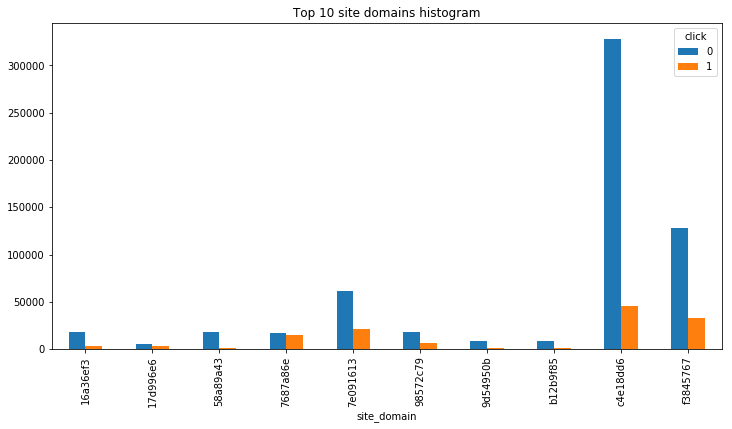

In [108]:
top10_domain = train[(train.site_domain.isin((train.site_domain.value_counts()/len(train))[0:10].index))]
top10_domain_click = top10_domain[top10_domain['click'] == 1]
top10_domain.groupby(['site_domain', 'click']).size().unstack().plot(kind='bar', figsize=(12,6), title='Top 10 site domains histogram');

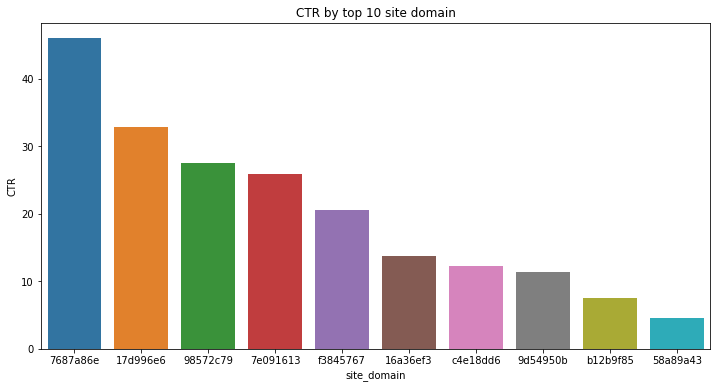

In [109]:
df_domain = top10_domain[['site_domain','click']].groupby(['site_domain']).count().reset_index()
df_domain = df_domain.rename(columns={'click': 'impressions'})
df_domain['clicks'] = top10_domain_click[['site_domain','click']].groupby(['site_domain']).count().reset_index()['click']
df_domain['CTR'] = df_domain['clicks']/df_domain['impressions']*100
sort_domain = df_domain.sort_values(by='CTR',ascending=False)['site_domain'].tolist()
plt.figure(figsize=(12,6))
sns.barplot(y='CTR', x='site_domain', data=df_domain, order=sort_domain)
plt.title('CTR by top 10 site domain');

# Device features

In [110]:
print('The top 10 devices that have the most impressions')
print((train.device_id.value_counts()/len(train))[0:10])

The top 10 devices that have the most impressions
a99f214a    0.825167
0f7c61dc    0.000553
c357dbff    0.000517
936e92fb    0.000338
afeffc18    0.000242
b09da1c4    0.000122
987552d1    0.000108
cef4c8cc    0.000098
d857ffbb    0.000094
28dc8687    0.000093
Name: device_id, dtype: float64


In [111]:
top10_devices = (train.device_id.value_counts()/len(train))[0:10].index
click_avg_list=[]

for i in top10_devices:
    click_avg=train.loc[np.where((train.device_id == i))].click.mean()
    click_avg_list.append(click_avg)
    print("for device id value: {},  click through rate: {}".format(i,click_avg))

for device id value: a99f214a,  click through rate: 0.17404961662305934
for device id value: 0f7c61dc,  click through rate: 0.7613019891500904
for device id value: c357dbff,  click through rate: 0.6595744680851063
for device id value: 936e92fb,  click through rate: 0.0621301775147929
for device id value: afeffc18,  click through rate: 0.21487603305785125
for device id value: b09da1c4,  click through rate: 0.09836065573770492
for device id value: 987552d1,  click through rate: 0.0
for device id value: cef4c8cc,  click through rate: 0.30612244897959184
for device id value: d857ffbb,  click through rate: 0.19148936170212766
for device id value: 28dc8687,  click through rate: 0.0


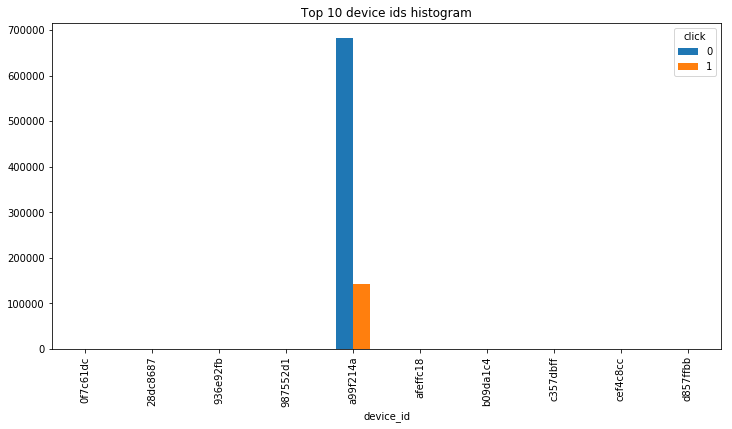

In [112]:
top10_device = train[(train.device_id.isin((train.device_id.value_counts()/len(train))[0:10].index))]
top10_device_click = top10_device[top10_device['click'] == 1]
top10_device.groupby(['device_id', 'click']).size().unstack().plot(kind='bar', figsize=(12,6), title='Top 10 device ids histogram');

In [113]:
print("There are {} device ips in the data set".format(train.device_ip.nunique()))
print("There are {} device types in the data set".format(train.device_type.nunique()))
print("There are {} device models in the data set".format(train.device_model.nunique()))
print("There are {} device cnn types in the data set".format(train.device_conn_type.nunique()))


There are 555814 device ips in the data set
There are 5 device types in the data set
There are 5180 device models in the data set
There are 4 device cnn types in the data set


In [114]:
print('The impressions by device types')
print((train.device_type.value_counts()/len(train)))

The impressions by device types
1    0.922824
0    0.054873
4    0.019097
5    0.003204
2    0.000002
Name: device_type, dtype: float64


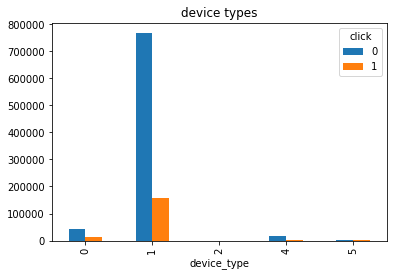

In [115]:
train[['device_type','click']].groupby(['device_type','click']).size().unstack().plot(kind='bar', title='device types');

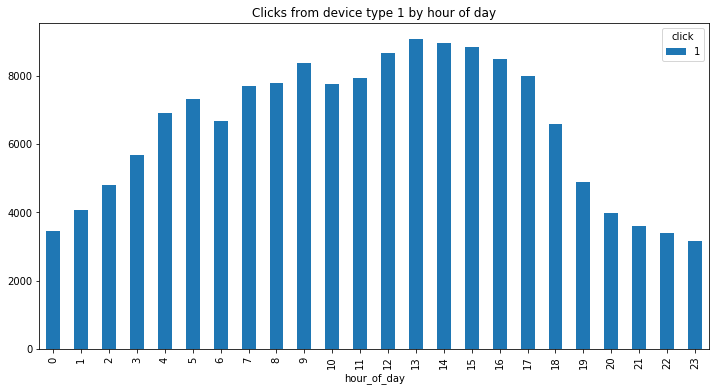

In [116]:
df_click[df_click['device_type']==1].groupby(['hour_of_day', 'click']).size().unstack().plot(kind='bar', title="Clicks from device type 1 by hour of day", figsize=(12,6));

In [117]:
device_type_click = df_click.groupby('device_type').agg({'click':'sum'}).reset_index()
device_type_impression = train.groupby('device_type').agg({'click':'count'}).reset_index().rename(columns={'click': 'impressions'})
merged_device_type = pd.merge(left = device_type_click , right = device_type_impression, how = 'inner', on = 'device_type')

In [118]:
merged_device_type['CTR'] = merged_device_type['click'] / merged_device_type['impressions']*100


In [119]:
merged_device_type

,device_type,click,impressions,CTR
0,0,11701,54873,21.323784
1,1,156115,922824,16.917094
2,4,1816,19097,9.509347
3,5,288,3204,8.988764


The highest CTR comes from device type 0.

In [120]:
print("There are {} C14 in the data set".format(train.C14.nunique()))
print("There are {} C15 in the data set".format(train.C15.nunique()))
print("There are {} C16 in the data set".format(train.C16.nunique()))
print("There are {} C17 in the data set".format(train.C17.nunique()))
print("There are {} C18 in the data set".format(train.C18.nunique()))
print("There are {} C19 in the data set".format(train.C19.nunique()))
print("There are {} C20 in the data set".format(train.C20.nunique()))

There are 2241 C14 in the data set
There are 8 C15 in the data set
There are 9 C16 in the data set
There are 422 C17 in the data set
There are 4 C18 in the data set
There are 66 C19 in the data set
There are 164 C20 in the data set


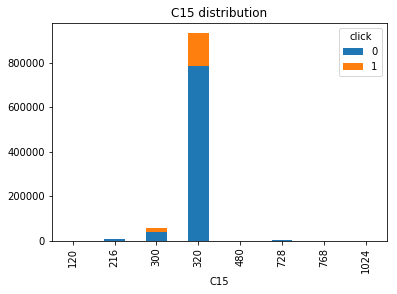

In [121]:
train.groupby(['C15', 'click']).size().unstack().plot(kind='bar', stacked=True, title='C15 distribution');

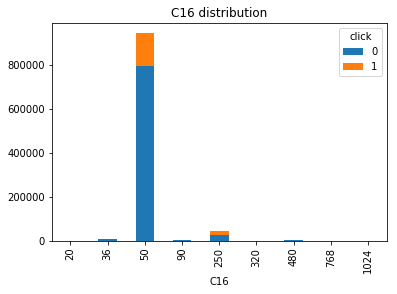

In [122]:

train.groupby(['C16', 'click']).size().unstack().plot(kind='bar', stacked=True, title='C16 distribution');

In [123]:
def convert_obj_to_int(self):
    
    object_list_columns = self.columns
    object_list_dtypes = self.dtypes
    new_col_suffix = '_int'
    for index in range(0,len(object_list_columns)):
        if object_list_dtypes[index] == object :
            self[object_list_columns[index]+new_col_suffix] = self[object_list_columns[index]].map( lambda  x: hash(x))
            self.drop([object_list_columns[index]],inplace=True,axis=1)
    return self
train = convert_obj_to_int(train)

In [124]:
train.drop('hour', axis=1, inplace=True)

train.drop('id', axis=1, inplace=True)

In [127]:

X_train = train.loc[:, train.columns != 'click']
y_target = train.click.values


In [128]:
from operator import itemgetter
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import roc_auc_score

def run_default_test(train, test, features, target, random_state=0):
    eta = 0.1
    max_depth = 5
    subsample = 0.8
    colsample_bytree = 0.8
    print('XGBoost params. ETA: {}, MAX_DEPTH: {}, SUBSAMPLE: {}, COLSAMPLE_BY_TREE: {}'.format(eta, max_depth, subsample, colsample_bytree))
    params = {
        "objective": "binary:logistic",
        "booster" : "gbtree",
        "eval_metric": "logloss",
        "eta": eta,
        "max_depth": max_depth,
        "subsample": subsample,
        "colsample_bytree": colsample_bytree,
        "silent": 1,
        "seed": random_state
    }
    num_boost_round = 260
    early_stopping_rounds = 20
    test_size = 0.2

    X_train, X_valid = train_test_split(train, test_size=test_size, random_state=random_state)
    y_train = X_train[target]
    y_valid = X_valid[target]
    dtrain = xgb.DMatrix(X_train[features], y_train)
    dvalid = xgb.DMatrix(X_valid[features], y_valid)
    watchlist = [(dtrain, 'train'), (dvalid, 'eval')]
    gbm = xgb.train(params, dtrain, num_boost_round, evals=watchlist, early_stopping_rounds=early_stopping_rounds, verbose_eval=True)

In [129]:

features = ['C1', 'banner_pos', 'device_type', 'device_conn_type', 'C14',
       'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21', 'hour_of_day',
       'site_id_int', 'site_domain_int', 'site_category_int', 'app_id_int',
       'app_domain_int', 'app_category_int', 'device_id_int', 'device_ip_int',
       'device_model_int', 'day_of_week_int']
run_default_test(train, y_target, features, 'click')

XGBoost params. ETA: 0.1, MAX_DEPTH: 5, SUBSAMPLE: 0.8, COLSAMPLE_BY_TREE: 0.8


/Users/mananparasher/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/mananparasher/anaconda3/lib/python3.6/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[0]	train-logloss:0.648492	eval-logloss:0.648421
Multiple eval metrics have been passed: 'eval-logloss' will be used for early stopping.

Will train until eval-logloss hasn't improved in 20 rounds.
[1]	train-logloss:0.611945	eval-logloss:0.61225
[2]	train-logloss:0.582031	eval-logloss:0.582022
[3]	train-logloss:0.556931	eval-logloss:0.55698
[4]	train-logloss:0.535962	eval-logloss:0.536126
[5]	train-logloss:0.518051	eval-logloss:0.518431
[6]	train-logloss:0.503267	eval-logloss:0.503687
[7]	train-logloss:0.490991	eval-logloss:0.491304
[8]	train-logloss:0.480252	eval-logloss:0.480655
[9]	train-logloss:0.471142	eval-logloss:0.471594
[10]	train-logloss:0.463339	eval-logloss:0.463745
[11]	train-logloss:0.456485	eval-logloss:0.457133
[12]	train-logloss:0.451045	eval-logloss:0.45155
[13]	train-logloss:0.445836	eval-logloss:0.446463
[14]	train-logloss:0.441618	eval-logloss:0.442225
[15]	train-logloss:0.437961	eval-logloss:0.438652
[16]	train-logloss:0.434986	eval-logloss:0.435628
[17]	train-log

[161]	train-logloss:0.402464	eval-logloss:0.404618
[162]	train-logloss:0.402359	eval-logloss:0.404528
[163]	train-logloss:0.402336	eval-logloss:0.404513
[164]	train-logloss:0.402309	eval-logloss:0.404491
[165]	train-logloss:0.402288	eval-logloss:0.404478
[166]	train-logloss:0.402266	eval-logloss:0.404468
[167]	train-logloss:0.402208	eval-logloss:0.404424
[168]	train-logloss:0.40219	eval-logloss:0.404412
[169]	train-logloss:0.402137	eval-logloss:0.404367
[170]	train-logloss:0.402123	eval-logloss:0.404363
[171]	train-logloss:0.402037	eval-logloss:0.404274
[172]	train-logloss:0.401993	eval-logloss:0.404244
[173]	train-logloss:0.401973	eval-logloss:0.404242
[174]	train-logloss:0.401943	eval-logloss:0.404211
[175]	train-logloss:0.401898	eval-logloss:0.404188
[176]	train-logloss:0.401867	eval-logloss:0.404174
[177]	train-logloss:0.401842	eval-logloss:0.404158
[178]	train-logloss:0.401802	eval-logloss:0.404125
[179]	train-logloss:0.401777	eval-logloss:0.404115
[180]	train-logloss:0.40176	eval

In [136]:
train['click']

0         0
1         0
2         0
3         1
4         0
5         0
6         0
7         0
8         0
9         0
10        0
11        0
12        0
13        0
14        0
15        1
16        0
17        0
18        0
19        0
20        1
21        0
22        0
23        0
24        1
25        0
26        0
27        0
28        0
29        0
         ..
999970    0
999971    0
999972    0
999973    0
999974    0
999975    0
999976    0
999977    0
999978    0
999979    0
999980    0
999981    1
999982    1
999983    0
999984    0
999985    1
999986    0
999987    0
999988    0
999989    0
999990    0
999991    1
999992    0
999993    0
999994    0
999995    0
999996    0
999997    1
999998    0
999999    0
Name: click, Length: 1000000, dtype: int64